# Pattern of Crime with Arrest in the Past 5 Years

In [56]:
#from pyspark import SparkContext
from pyspark import SparkContext
import csv
from operator import add
from datetime import datetime, date
import pandas as pd

from pyspark.sql.types import DoubleType
from pyspark.sql.types import IntegerType
from pyspark.sql.types import StringType
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sc = SparkContext.getOrCreate()


In [12]:
#use when done with current pyspark context
sc.stop()

In [2]:
crimeFile = sc.textFile("Crimes_-_2001_to_present.csv")


In [4]:
crimeFile.count()

5801845

In [3]:
crimeFile.take(5)

['ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location',
 '10078659,HY267429,05/19/2015 11:57:00 PM,010XX E 79TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,true,false,0624,006,8,44,15,1184626,1852799,2015,05/26/2015 12:42:06 PM,41.751242944,-87.599004724,"(41.751242944, -87.599004724)"',
 '10078598,HY267408,05/19/2015 11:50:00 PM,067XX N SHERIDAN RD,3731,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,STREET,true,false,2432,024,49,1,24,1167071,1944859,2015,05/26/2015 12:42:06 PM,42.004255918,-87.660691083,"(42.004255918, -87.660691083)"',
 '10078625,HY267417,05/19/2015 11:47:00 PM,026XX E 77TH ST,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,true,false,0421,004,7,43,18,1195299,1854463,2015,05/26/2015 12:42:06 PM,41.755552462,-87.559839339,"(41.755552462, -87.559839339)"',
 '10078662,HY267423,05/19/2015 1

In [4]:
schemaString=crimeFile.first()
schemaString

'ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location'

In [40]:
#remove header
#fields = crimeFile.filter(lambda line: line!= schemaString)
#split by "," to create columns
fields = crimeFile.map(lambda line: line.split(","))
fields.take(5)

[['ID',
  'Case Number',
  'Date',
  'Block',
  'IUCR',
  'Primary Type',
  'Description',
  'Location Description',
  'Arrest',
  'Domestic',
  'Beat',
  'District',
  'Ward',
  'Community Area',
  'FBI Code',
  'X Coordinate',
  'Y Coordinate',
  'Year',
  'Updated On',
  'Latitude',
  'Longitude',
  'Location'],
 ['10078659',
  'HY267429',
  '05/19/2015 11:57:00 PM',
  '010XX E 79TH ST',
  '143A',
  'WEAPONS VIOLATION',
  'UNLAWFUL POSS OF HANDGUN',
  'STREET',
  'true',
  'false',
  '0624',
  '006',
  '8',
  '44',
  '15',
  '1184626',
  '1852799',
  '2015',
  '05/26/2015 12:42:06 PM',
  '41.751242944',
  '-87.599004724',
  '"(41.751242944',
  ' -87.599004724)"'],
 ['10078598',
  'HY267408',
  '05/19/2015 11:50:00 PM',
  '067XX N SHERIDAN RD',
  '3731',
  'INTERFERENCE WITH PUBLIC OFFICER',
  'OBSTRUCTING IDENTIFICATION',
  'STREET',
  'true',
  'false',
  '2432',
  '024',
  '49',
  '1',
  '24',
  '1167071',
  '1944859',
  '2015',
  '05/26/2015 12:42:06 PM',
  '42.004255918',
  '-87

In [42]:
#extract past 5 years data:
fields = fields.filter(lambda x: x[17]=="2011" or x[17]=="2012" or x[17]=="2013" or x[17]=="2014" or x[17]=="2015")
fields.take(3)

[['10078659',
  'HY267429',
  '05/19/2015 11:57:00 PM',
  '010XX E 79TH ST',
  '143A',
  'WEAPONS VIOLATION',
  'UNLAWFUL POSS OF HANDGUN',
  'STREET',
  'true',
  'false',
  '0624',
  '006',
  '8',
  '44',
  '15',
  '1184626',
  '1852799',
  '2015',
  '05/26/2015 12:42:06 PM',
  '41.751242944',
  '-87.599004724',
  '"(41.751242944',
  ' -87.599004724)"'],
 ['10078598',
  'HY267408',
  '05/19/2015 11:50:00 PM',
  '067XX N SHERIDAN RD',
  '3731',
  'INTERFERENCE WITH PUBLIC OFFICER',
  'OBSTRUCTING IDENTIFICATION',
  'STREET',
  'true',
  'false',
  '2432',
  '024',
  '49',
  '1',
  '24',
  '1167071',
  '1944859',
  '2015',
  '05/26/2015 12:42:06 PM',
  '42.004255918',
  '-87.660691083',
  '"(42.004255918',
  ' -87.660691083)"'],
 ['10078625',
  'HY267417',
  '05/19/2015 11:47:00 PM',
  '026XX E 77TH ST',
  '2170',
  'NARCOTICS',
  'POSSESSION OF DRUG EQUIPMENT',
  'STREET',
  'true',
  'false',
  '0421',
  '004',
  '7',
  '43',
  '18',
  '1195299',
  '1854463',
  '2015',
  '05/26/2015 

In [41]:
#filter to keep crime with arrest
fields = fields.filter(lambda x: x[8]=="true")
fields.take(3)

[['10078659',
  'HY267429',
  '05/19/2015 11:57:00 PM',
  '010XX E 79TH ST',
  '143A',
  'WEAPONS VIOLATION',
  'UNLAWFUL POSS OF HANDGUN',
  'STREET',
  'true',
  'false',
  '0624',
  '006',
  '8',
  '44',
  '15',
  '1184626',
  '1852799',
  '2015',
  '05/26/2015 12:42:06 PM',
  '41.751242944',
  '-87.599004724',
  '"(41.751242944',
  ' -87.599004724)"'],
 ['10078598',
  'HY267408',
  '05/19/2015 11:50:00 PM',
  '067XX N SHERIDAN RD',
  '3731',
  'INTERFERENCE WITH PUBLIC OFFICER',
  'OBSTRUCTING IDENTIFICATION',
  'STREET',
  'true',
  'false',
  '2432',
  '024',
  '49',
  '1',
  '24',
  '1167071',
  '1944859',
  '2015',
  '05/26/2015 12:42:06 PM',
  '42.004255918',
  '-87.660691083',
  '"(42.004255918',
  ' -87.660691083)"'],
 ['10078625',
  'HY267417',
  '05/19/2015 11:47:00 PM',
  '026XX E 77TH ST',
  '2170',
  'NARCOTICS',
  'POSSESSION OF DRUG EQUIPMENT',
  'STREET',
  'true',
  'false',
  '0421',
  '004',
  '7',
  '43',
  '18',
  '1195299',
  '1854463',
  '2015',
  '05/26/2015 

## Total number of crimes with arrest by hour of the day

In [43]:
#key value pair of (hour of the day, crime)
pairs=fields.map(lambda x: (datetime.strptime(x[2],'%m/%d/%Y %I:%M:%S %p').time().hour, 1))
#pairs.take(3)
counts = pairs.reduceByKey(lambda x,y: int(x) + int(y))
counts.take(24)

[(0, 14860),
 (1, 10850),
 (2, 8431),
 (3, 5950),
 (4, 3872),
 (5, 2558),
 (6, 4483),
 (7, 4996),
 (8, 7535),
 (9, 9445),
 (10, 15383),
 (11, 19923),
 (12, 19363),
 (13, 17999),
 (14, 18686),
 (15, 19850),
 (16, 18844),
 (17, 17401),
 (18, 21365),
 (19, 28558),
 (20, 26586),
 (21, 24559),
 (22, 23305),
 (23, 19155)]

In [44]:
#re-arrange and convert back to dataframe
toDF=counts.map(lambda x: [x[0],x[1]])
toDF.take(3)

[[0, 14860], [1, 10850], [2, 8431]]

In [45]:
def build_schema():
    """Build and return a schema to use for the sample data."""
    schema = StructType(
        [
            StructField("hourOfDay", StringType(), True),
            StructField("numOfCrime", IntegerType(), True),
        ]
    )
    return schema

In [46]:
#convert to spark dataframe than to pandas dataframe for visualization
#convert to spark dataframe
countsDF = spark.createDataFrame(toDF, schema=build_schema())
#countsDF.printSchema()
#countsDF.show(3)
#convert from spark dataframe to pandas dataframe
countsDF=countsDF.toPandas()
countsDF

,hourOfDay,numOfCrime
0,0,14860
1,1,10850
2,2,8431
3,3,5950
4,4,3872
5,5,2558
6,6,4483
7,7,4996
8,8,7535
9,9,9445


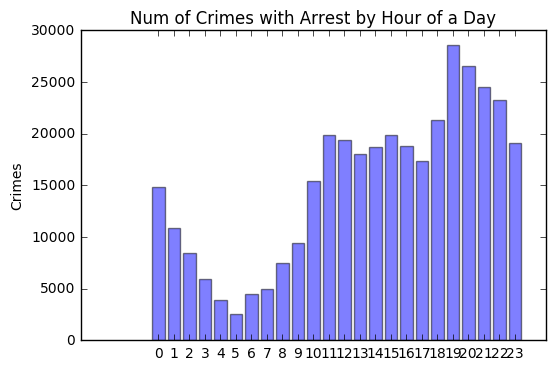

In [61]:
#plot bar chart 
hours = countsDF['hourOfDay'].tolist()
y_pos = np.arange(len(hours))
crimes = countsDF['numOfCrime'].tolist()
 
plt.bar(y_pos, crimes, align='center', alpha=0.5)
plt.xticks(y_pos, hours)
plt.ylabel('Crimes')
plt.title('Num of Crimes with Arrest by Hour of a Day')
 
plt.show()

Number of crimes with arrest reach a peak at around 7pm at night and stay high thru 10pm, while the lowest point in a day is at 5am in the morning. 

## Total number of crimes with arrest by day of the week

In [47]:
#key value pair of (day of the week, crime)
#Monday is 0 and Sunday is 6
pairs2=fields.map(lambda x: (datetime.strptime(x[2],'%m/%d/%Y %I:%M:%S %p').date().weekday(), 1))
#pairs2.take(3)
counts2 = pairs2.reduceByKey(lambda x,y: int(x) + int(y))
counts2.take(7)

[(0, 49736),
 (1, 52353),
 (2, 52982),
 (3, 52179),
 (4, 54161),
 (5, 53220),
 (6, 49326)]

In [48]:
#re-arrange and convert back to dataframe
toDF2=counts2.map(lambda x: [x[0],x[1]])
toDF2.take(3)

[[0, 49736], [1, 52353], [2, 52982]]

In [49]:
def build_schema2():
    """Build and return a schema to use for the sample data."""
    schema = StructType(
        [
            StructField("dayOfWeek", StringType(), True),
            StructField("numOfCrime", IntegerType(), True),
        ]
    )
    return schema

In [50]:
#convert to spark dataframe than to pandas dataframe for visualization
#convert to spark dataframe
countsDF2 = spark.createDataFrame(toDF2, schema=build_schema2())
#countsDF2.printSchema()
#countsDF2.show(3)
#convert from spark dataframe to pandas dataframe
countsDF2=countsDF2.toPandas()
countsDF2

,dayOfWeek,numOfCrime
0,0,49736
1,1,52353
2,2,52982
3,3,52179
4,4,54161
5,5,53220
6,6,49326


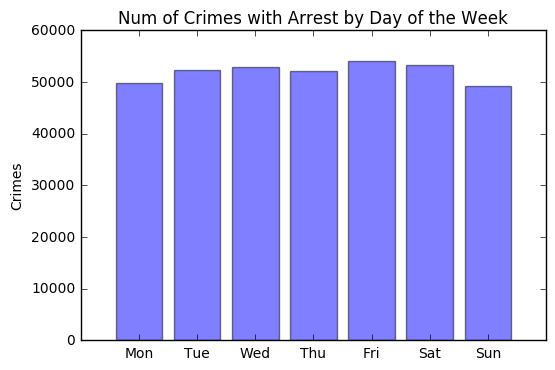

In [60]:
#plot bar chart 
weekdays = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun')
y_pos = np.arange(len(weekdays))
crimes = countsDF2['numOfCrime'].tolist()
 
plt.bar(y_pos, crimes, align='center', alpha=0.5)
plt.xticks(y_pos, weekdays)
plt.ylabel('Crimes')
plt.title('Num of Crimes with Arrest by Day of the Week')
 
plt.show()

Total number of crimes with arrest during a week is pretty flat with small increase on Fridays and Saturdays, when people go outdoors more. 

# Total number of crimes by day of the week

In [51]:
#key value pair of (day of the week, crime)
#Monday is 0 and Sunday is 6
pairs3=fields.map(lambda x: (datetime.strptime(x[2],'%m/%d/%Y %I:%M:%S %p').date().month, 1))
#pairs3.take(3)
counts3 = pairs3.reduceByKey(lambda x,y: int(x) + int(y))
counts3.take(7)

[(1, 32916),
 (2, 29928),
 (3, 35665),
 (4, 33831),
 (5, 33242),
 (6, 30354),
 (7, 32005)]

In [52]:
#re-arrange and convert back to dataframe
toDF3=counts3.map(lambda x: [x[0],x[1]])
toDF3.take(3)

[[1, 32916], [2, 29928], [3, 35665]]

In [53]:
def build_schema3():
    """Build and return a schema to use for the sample data."""
    schema = StructType(
        [
            StructField("monthOfYear", StringType(), True),
            StructField("numOfCrime", IntegerType(), True),
        ]
    )
    return schema

In [54]:
#convert to spark dataframe than to pandas dataframe for visualization
#convert to spark dataframe
countsDF3 = spark.createDataFrame(toDF3, schema=build_schema3())
#countsDF3.printSchema()
#countsDF3.show(3)
#convert from spark dataframe to pandas dataframe
countsDF3=countsDF3.toPandas()
countsDF3

,monthOfYear,numOfCrime
0,1,32916
1,2,29928
2,3,35665
3,4,33831
4,5,33242
5,6,30354
6,7,32005
7,8,31259
8,9,28264
9,10,27458


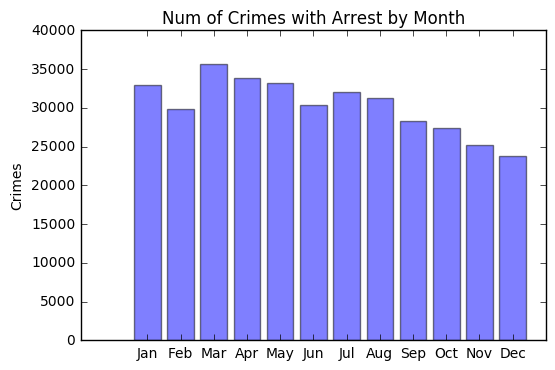

In [59]:
#plot bar chart 
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(months))
crimes = countsDF3['numOfCrime'].tolist()
 
plt.bar(y_pos, crimes, align='center', alpha=0.5)
plt.xticks(y_pos, months)
plt.ylabel('Crimes')
plt.title('Num of Crimes with Arrest by Month')
 
plt.show()

Total number of crimes with arrest peaks in March and remain high throughout the spring season, while crime numbers start dropping from September in the fall, and dive into lowest point in the winter in December. It could be both the cold weather in Chicago and holiday season that suppress people's will to commit crime. 